El objetivo de este Notebook es realizar una limpieza de datos y un EDA de un dataset que corresponde a la evolución de una planta fotovoltaica desde enero del 2022 hasta diciembre del 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CARGA DATASET

In [2]:
df = pd.read_csv(r"C:\Users\javier.sdiaz\Proyecto ML_2025\data\raw\PFV Machine Learning.csv", sep=";")
df


Fecha_Hora     Temp_amb Radiacion_1 Radiacion_2   Dir_viento  \
0        01/01/2022 0:00  11,34651225           0           0  222,5584223   
1        01/01/2022 0:15  11,30000019           0           0  223,0875892   
2        01/01/2022 0:30  11,30666706           0           0  224,8936094   
3        01/01/2022 0:45  11,29333332           0           0  223,5345474   
4        01/01/2022 1:00  11,25985316           0           0  230,9272346   
...                  ...          ...         ...         ...          ...   
105211  31/12/2024 22:45   4,14514946           0           0   223,663976   
105212  31/12/2024 23:00  4,245147515           0           0  219,7009281   
105213  31/12/2024 23:15   4,37695687           0           0  222,8248332   
105214  31/12/2024 23:30  4,493333221           0           0  220,4844263   
105215  31/12/2024 23:45  4,596948484           0           0  224,6307418   

         Vel_viento      Energia Potencia     Oil_Temp cosPhi  ... Idc4 Idc5  \
0       2,611366846  26,93174724        0  26,07907206      0  ...    0    0   
1       2,582712548            0        0  25,47908349      0  ...    0    0   
2       2,640629441            0        0  24,87909492      0  ...    0    0   
3       2,808004556            0        0   24,2791821      0  ...    0    0   
4       3,147298226            0        0  23,74596804      0  ...    0    0   
...             ...          ...      ...          ...    ...  ...  ...  ...   
105211  5,285611046       740,75        0  8,529718375      0  ...    0    0   
105212  5,490528776       740,75        0  8,329722649      0  ...    0    0   
105213   5,04882454       740,75        0  8,329722649      0  ...    0    0   
105214  4,876355937       740,75        0  8,329722649      0  ...    0    0   
105215  5,562875596  738,9370936        0  8,329722649      0  ...    0    0   

       Idc6 Idc7 Idc8     Temp_int  Q           V1           V2           V3  
0         0    0    0  20,32976765  0  381,3455601  384,5984618  380,3636747  
1         0    0    0  20,17977039  0   381,767485  384,8353054  380,9201517  
2         0    0    0  20,02977313  0  382,8284386  385,5443126   382,013119  
3         0    0    0  19,87977586  0  383,7695102  386,4041716  382,9180621  
4         0    0    0  19,74149471  0  382,8361455  385,6313798  382,1717213  
...     ...  ...  ...          ... ..          ...          ...          ...  
105211    0    0    0  10,08530968  0  381,3733907   382,198627  381,8437139  
105212    0    0    0  10,11795163  0  381,7256941  382,0004276  381,5076763  
105213    0    0    0  10,11795163  0  381,7256941  382,0004276  381,5076763  
105214    0    0    0  10,11795163  0  381,7256941  382,0004276  381,5076763  
105215    0    0    0  10,11795163  0  381,7256941  382,0004276  381,5076763  

[105216 rows x 27 columns]

# 2. ANALISIS EXPLORATORIO DE DATOS

Sustituición de "," por "." para el tratamiento de los datos.

In [3]:
df = df.apply(lambda x: x.str.replace(",", ".", regex=True) if x.dtype == "object" else x)
df.head()

Fecha_Hora     Temp_amb Radiacion_1 Radiacion_2   Dir_viento  \
0  01/01/2022 0:00  11.34651225           0           0  222.5584223   
1  01/01/2022 0:15  11.30000019           0           0  223.0875892   
2  01/01/2022 0:30  11.30666706           0           0  224.8936094   
3  01/01/2022 0:45  11.29333332           0           0  223.5345474   
4  01/01/2022 1:00  11.25985316           0           0  230.9272346   

    Vel_viento      Energia Potencia     Oil_Temp cosPhi  ... Idc4 Idc5 Idc6  \
0  2.611366846  26.93174724        0  26.07907206      0  ...    0    0    0   
1  2.582712548            0        0  25.47908349      0  ...    0    0    0   
2  2.640629441            0        0  24.87909492      0  ...    0    0    0   
3  2.808004556            0        0   24.2791821      0  ...    0    0    0   
4  3.147298226            0        0  23.74596804      0  ...    0    0    0   

  Idc7 Idc8     Temp_int  Q           V1           V2           V3  
0    0    0  20.32976765  0  381.3455601  384.5984618  380.3636747  
1    0    0  20.17977039  0   381.767485  384.8353054  380.9201517  
2    0    0  20.02977313  0  382.8284386  385.5443126   382.013119  
3    0    0  19.87977586  0  383.7695102  386.4041716  382.9180621  
4    0    0  19.74149471  0  382.8361455  385.6313798  382.1717213  

[5 rows x 27 columns]

Convertir la columna Fecha_Hora a datetime y convertirla en indice.

In [4]:
# Convertir 'Fecha_Hora' a datetime
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format="%d/%m/%Y %H:%M")


# Establecer 'Fecha_Hora' como índice
df.set_index('Fecha_Hora', inplace=True)

In [5]:
# Tamaño del dataset (filas, columnas)
print("Dimensiones del dataset:", df.shape)


Dimensiones del dataset: (105216, 26)


In [6]:
# Información general del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105216 entries, 2022-01-01 00:00:00 to 2024-12-31 23:45:00
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Temp_amb       105216 non-null  object
 1   Radiacion_1    105216 non-null  object
 2   Radiacion_2    105216 non-null  object
 3   Dir_viento     105216 non-null  object
 4   Vel_viento     105216 non-null  object
 5   Energia        105216 non-null  object
 6   Potencia       105216 non-null  object
 7   Oil_Temp       105216 non-null  object
 8   cosPhi         105216 non-null  object
 9   Frecuencia     105216 non-null  object
 10  HeatsinkRTemp  105216 non-null  object
 11  HeatsinkSTemp  105216 non-null  object
 12  HeatsinkTTemp  105216 non-null  object
 13  Idc1           105216 non-null  object
 14  Idc2           105216 non-null  object
 15  Idc3           105216 non-null  object
 16  Idc4           105216 non-null  object
 17  Idc5          

El dataset consta de 25 columnas y 105217 filas, con ausencia de nulos y huecos, todas las columnas son del tipo object a excepción de la columna lluvia, se va realizar una conversión de las columnas tipo object a numéricas para realizar el análisis de las mismas.

In [7]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105216 entries, 2022-01-01 00:00:00 to 2024-12-31 23:45:00
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Temp_amb       105216 non-null  float64
 1   Radiacion_1    105216 non-null  float64
 2   Radiacion_2    105216 non-null  float64
 3   Dir_viento     105216 non-null  float64
 4   Vel_viento     105216 non-null  float64
 5   Energia        105216 non-null  float64
 6   Potencia       105216 non-null  float64
 7   Oil_Temp       105216 non-null  float64
 8   cosPhi         105216 non-null  float64
 9   Frecuencia     105216 non-null  float64
 10  HeatsinkRTemp  105216 non-null  float64
 11  HeatsinkSTemp  105216 non-null  float64
 12  HeatsinkTTemp  105216 non-null  float64
 13  Idc1           105216 non-null  float64
 14  Idc2           105216 non-null  float64
 15  Idc3           105216 non-null  float64
 16  Idc4           105216 non-null  float64


In [8]:
# Descripción estadística (solo numéricas)
df.describe()

Temp_amb    Radiacion_1    Radiacion_2     Dir_viento  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean       12.434834     149.429818     149.851044     189.632923   
std         7.528762     249.042306     247.950169      86.791055   
min        -8.758406       0.000000       0.000000       0.000000   
25%         7.277321       0.000000       0.000000     121.773551   
50%        11.807720       3.633737       4.009261     211.231500   
75%        17.394284     195.778226     196.515882     255.145664   
max        40.207415    1226.789514    1201.072162     356.690945   

          Vel_viento        Energia       Potencia       Oil_Temp  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean        3.303892    2869.902481     273.995899      34.597658   
std         2.002221    3915.102256     459.076759      18.316067   
min         0.000000       0.000000      -5.318807      -2.680146   
25%         1.802383       0.000000       0.000000      20.306889   
50%         2.887681     885.517786       0.000000      32.657737   
75%         4.445299    4601.229980     362.855464      47.491746   
max        15.786159   16726.449220    1745.548482     102.548603   

              cosPhi     Frecuencia  ...           Idc4           Idc5  \
count  105216.000000  105216.000000  ...  105216.000000  105216.000000   
mean        0.462793      49.599066  ...      31.878371      21.589994   
std         0.482716       4.421508  ...      53.239777      36.090463   
min        -0.908207       0.000000  ...       0.000000       0.000000   
25%         0.000000      49.981276  ...       0.000000       0.000000   
50%         0.091591      49.994610  ...       0.200000       0.200000   
75%         0.998561      50.007424  ...      41.915158      28.145094   
max         1.000000      50.125190  ...     229.680220     160.964744   

                Idc6           Idc7           Idc8       Temp_int  \
count  105216.000000  105216.000000  105216.000000  105216.000000   
mean       32.853738      35.394015      36.000661      21.312620   
std        54.966144      59.142427      59.920589       8.091732   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000      15.242664   
50%         0.282561       0.200000       0.300000      20.719887   
75%        43.023167      46.428985      47.292322      27.094039   
max       230.497120     250.626854     263.961878      51.055500   

                   Q             V1             V2             V3  
count  105216.000000  105216.000000  105216.000000  105216.000000  
mean       15.978630     380.157982     379.248981     379.334109  
std        38.979943      34.221478      34.103844      34.140209  
min       -10.786537       0.000000       0.000000       0.000000  
25%         0.000000     380.542851     379.818017     379.740740  
50%         0.000000     382.388063     382.236170     381.777504  
75%         1.525612     384.650165     384.636391     384.311038  
max       214.991643     398.754277     395.419819     397.148148  

[8 rows x 26 columns]

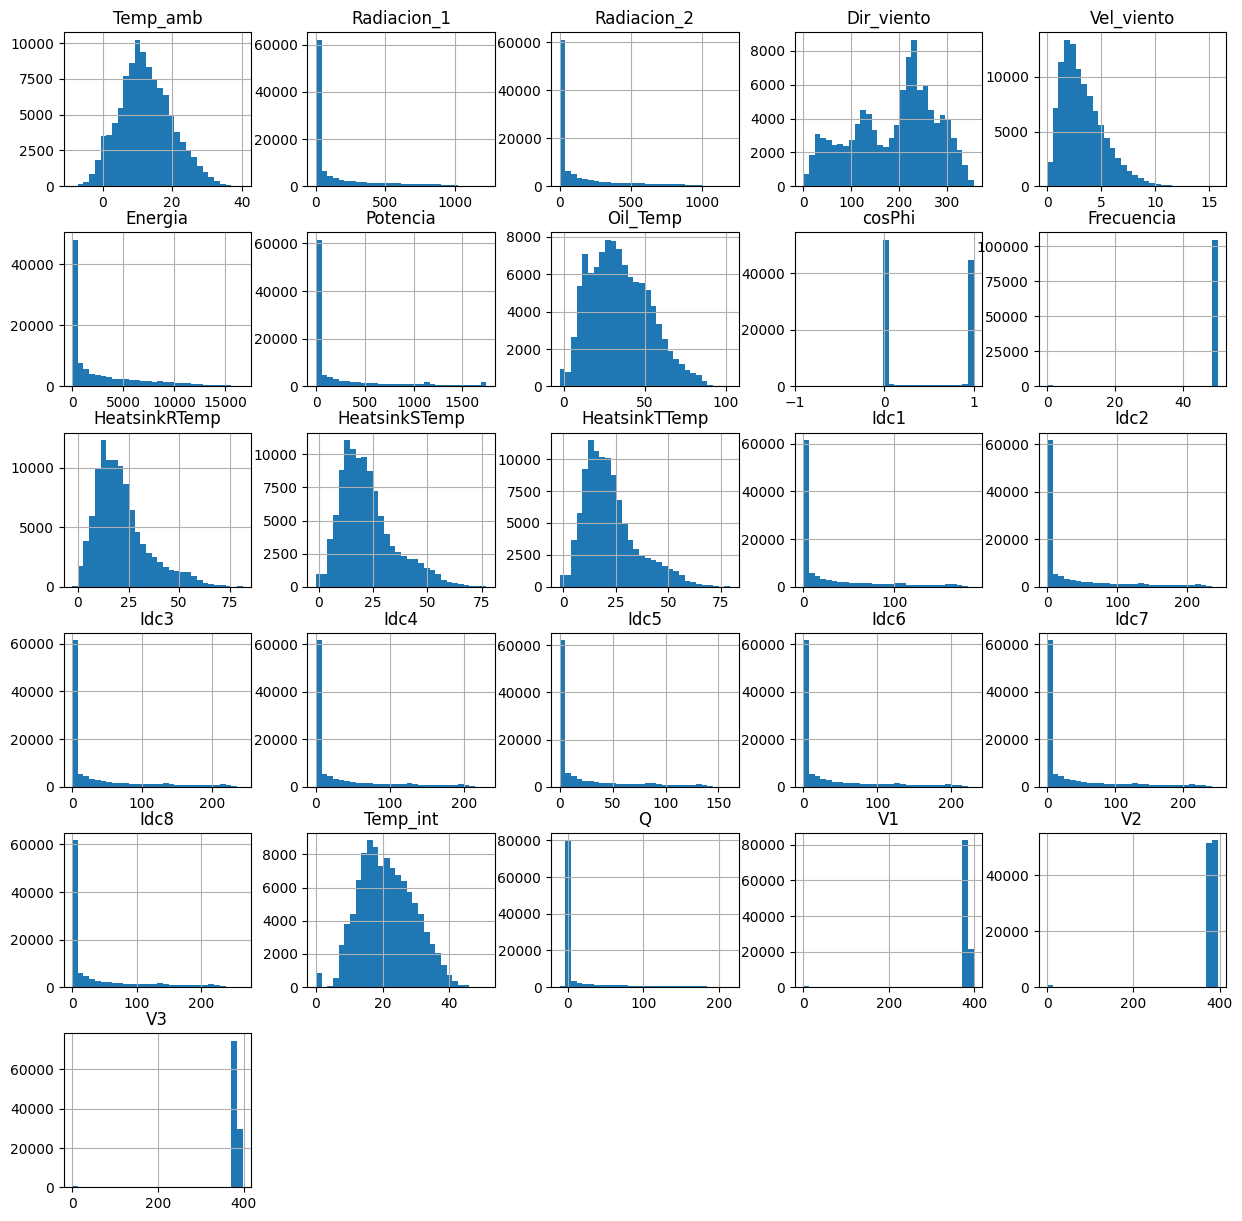

In [9]:
# Histogramas para variables numéricas
df.hist(figsize=(15, 15), bins=30)
plt.show()

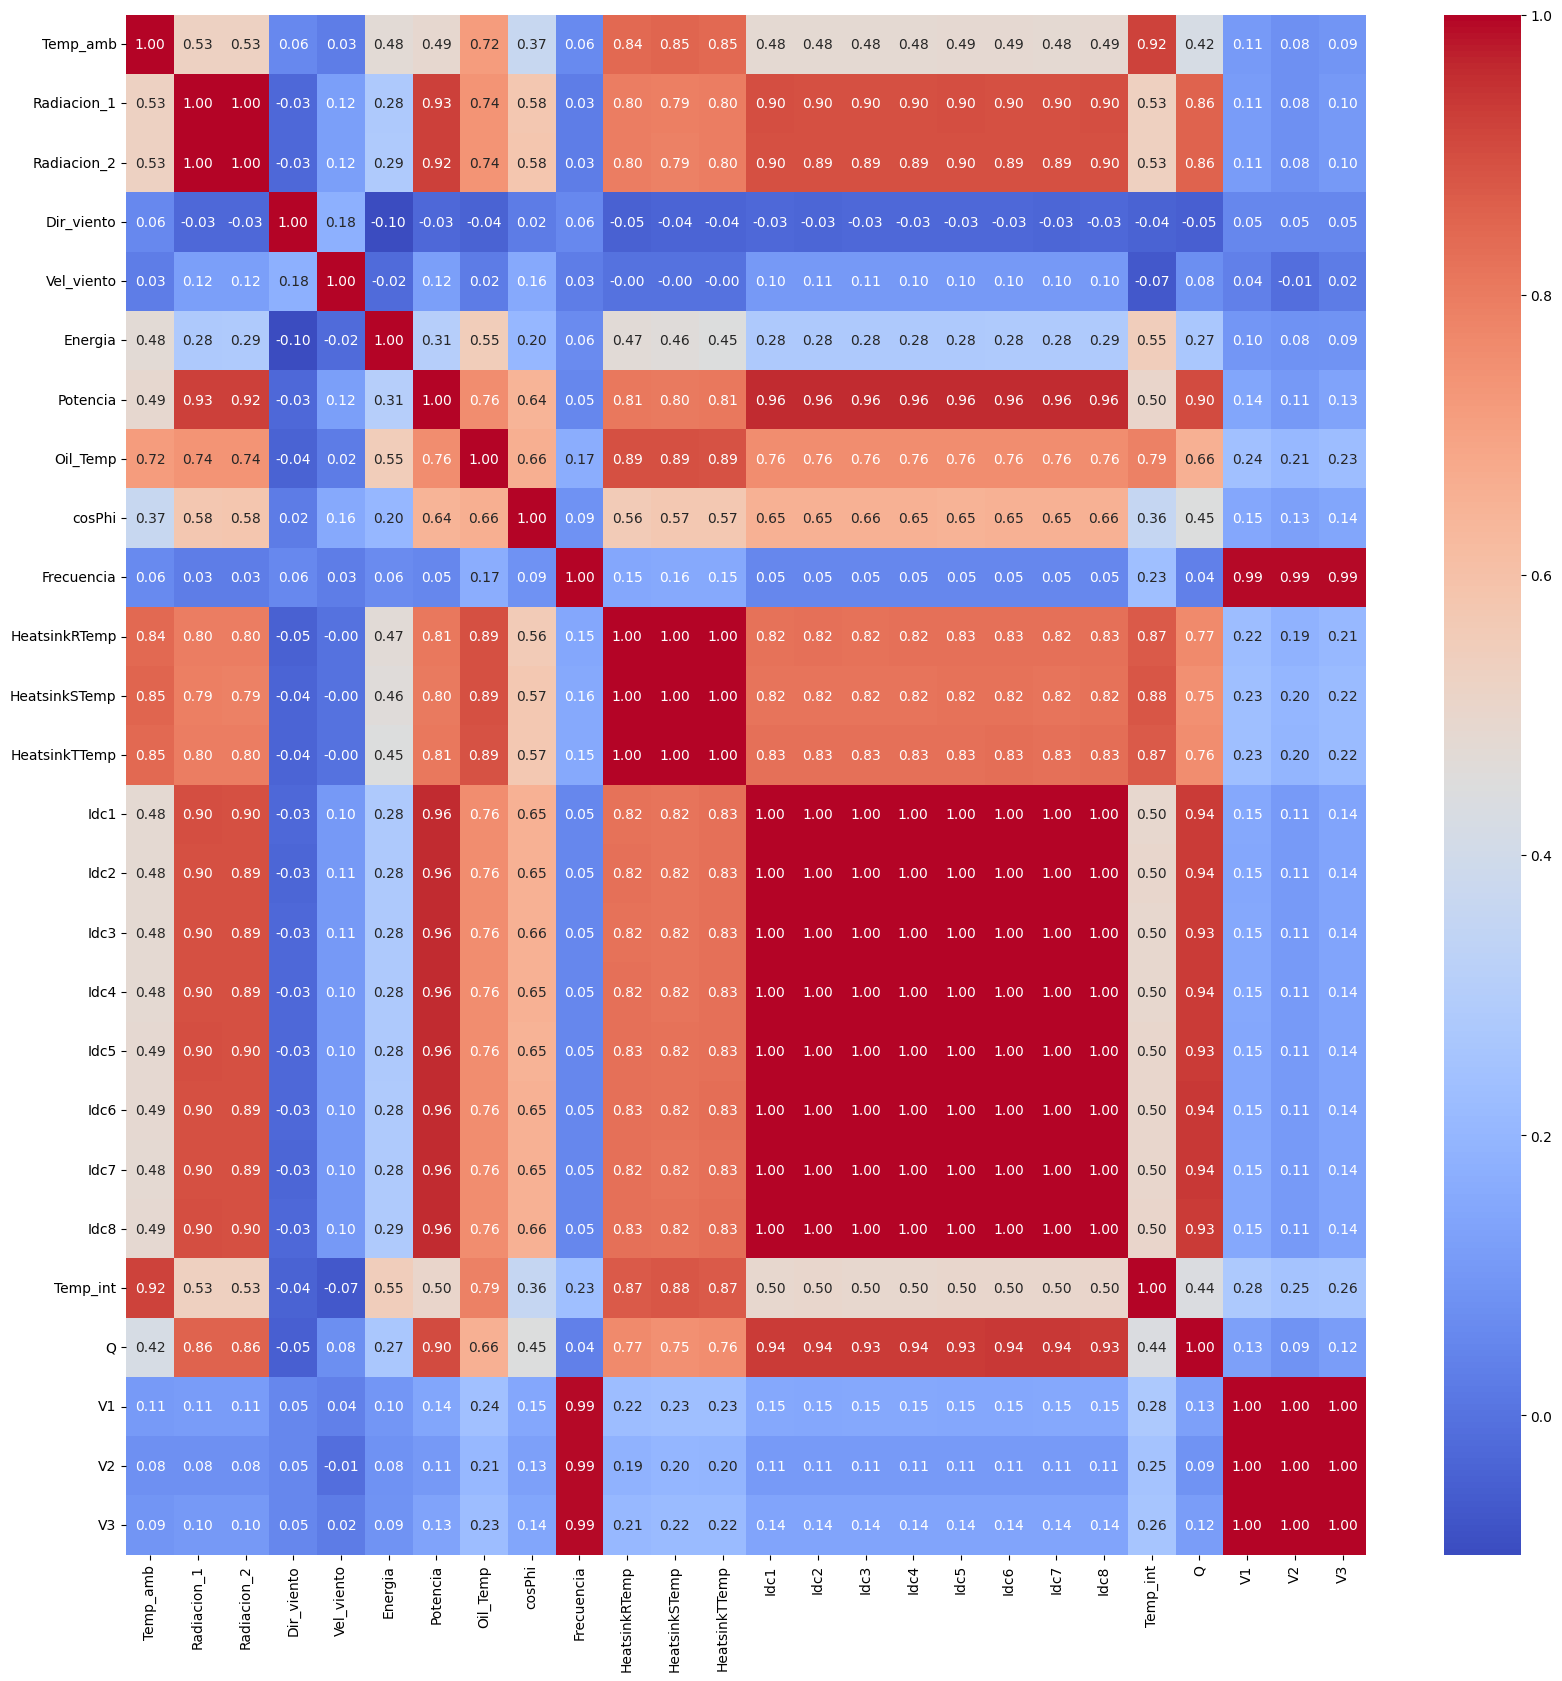

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# 3. FEATURE ENGINEER

Una vez realizada la matriz de correlación se observa que hay varias columnas que nos dan una información similar y se pueden unir entre ellas para reducir el tamaño del
dataframe y poder tratar de una manera más optima los datos:
  - Se genera una nueva columna llamada Rad_prom que resulta de realizar el promedio de la Radiacion_1 y Radiacion_2.
  - Se eliminan las columnas Radiacion_1 y Radiacion_2.
  - Se genera una nueva columna llamada HeatsinkTemp_prom que resulta de realizar el promedio de la HeatsinkR, HeatsinkS, HeatsinkT.
  - Se eliminan las columnas HeatsinkR, HeatsinkS, HeatsinkT.
  - Se genera una nueva columna llamada Idc_total que resulta de realizar el sumatorio de todas las Idc que componen el dataframe.
  - Se eliminan las columnas Idc1, Idc2, Idc3, Idc4, Idc5, Idc6, Idc7, Idc8.
  - Se genera una nueva columna llamada V_total que resulta de realizar el sumatorio de V1, V2 y V3.
  - Se eliminan las columnas V1, V2, V3.

In [11]:
df['Rad_prom'] = df[['Radiacion_1', 'Radiacion_2']].mean(axis=1)
df = df.drop(columns=['Radiacion_1', 'Radiacion_2'])

df['HeatsinkTemp_prom'] = df[['HeatsinkRTemp', 'HeatsinkSTemp', 'HeatsinkTTemp']].mean(axis=1)
df = df.drop(columns=['HeatsinkRTemp', 'HeatsinkSTemp', 'HeatsinkTTemp'])

df['Idc_total'] = df[['Idc1', 'Idc2', 'Idc3', 'Idc4', 'Idc5', 'Idc6', 'Idc7', 'Idc8']].sum(axis=1)
df = df.drop(columns=['Idc1', 'Idc2', 'Idc3', 'Idc4', 'Idc5', 'Idc6', 'Idc7', 'Idc8'])

df['V_total'] = df[['V1', 'V2', 'V3']].sum(axis=1)
df = df.drop(columns=['V1', 'V2', 'V3'])

df.head()

Temp_amb  Dir_viento  Vel_viento    Energia  Potencia  \
Fecha_Hora                                                                    
2022-01-01 00:00:00  11.346512  222.558422    2.611367  26.931747       0.0   
2022-01-01 00:15:00  11.300000  223.087589    2.582713   0.000000       0.0   
2022-01-01 00:30:00  11.306667  224.893609    2.640629   0.000000       0.0   
2022-01-01 00:45:00  11.293333  223.534547    2.808005   0.000000       0.0   
2022-01-01 01:00:00  11.259853  230.927235    3.147298   0.000000       0.0   

                      Oil_Temp  cosPhi  Frecuencia   Temp_int    Q  Rad_prom  \
Fecha_Hora                                                                     
2022-01-01 00:00:00  26.079072     0.0   49.960499  20.329768  0.0       0.0   
2022-01-01 00:15:00  25.479083     0.0   49.959999  20.179770  0.0       0.0   
2022-01-01 00:30:00  24.879095     0.0   49.959999  20.029773  0.0       0.0   
2022-01-01 00:45:00  24.279182     0.0   49.959999  19.879776  0.0       0.0   
2022-01-01 01:00:00  23.745968     0.0   49.960503  19.741495  0.0       0.0   

                     HeatsinkTemp_prom  Idc_total      V_total  
Fecha_Hora                                                      
2022-01-01 00:00:00          17.075259        0.0  1146.307697  
2022-01-01 00:15:00          16.883596        0.0  1147.522942  
2022-01-01 00:30:00          16.691933        0.0  1150.385870  
2022-01-01 00:45:00          16.506316        0.0  1153.091744  
2022-01-01 01:00:00          16.404334        0.0  1150.639247

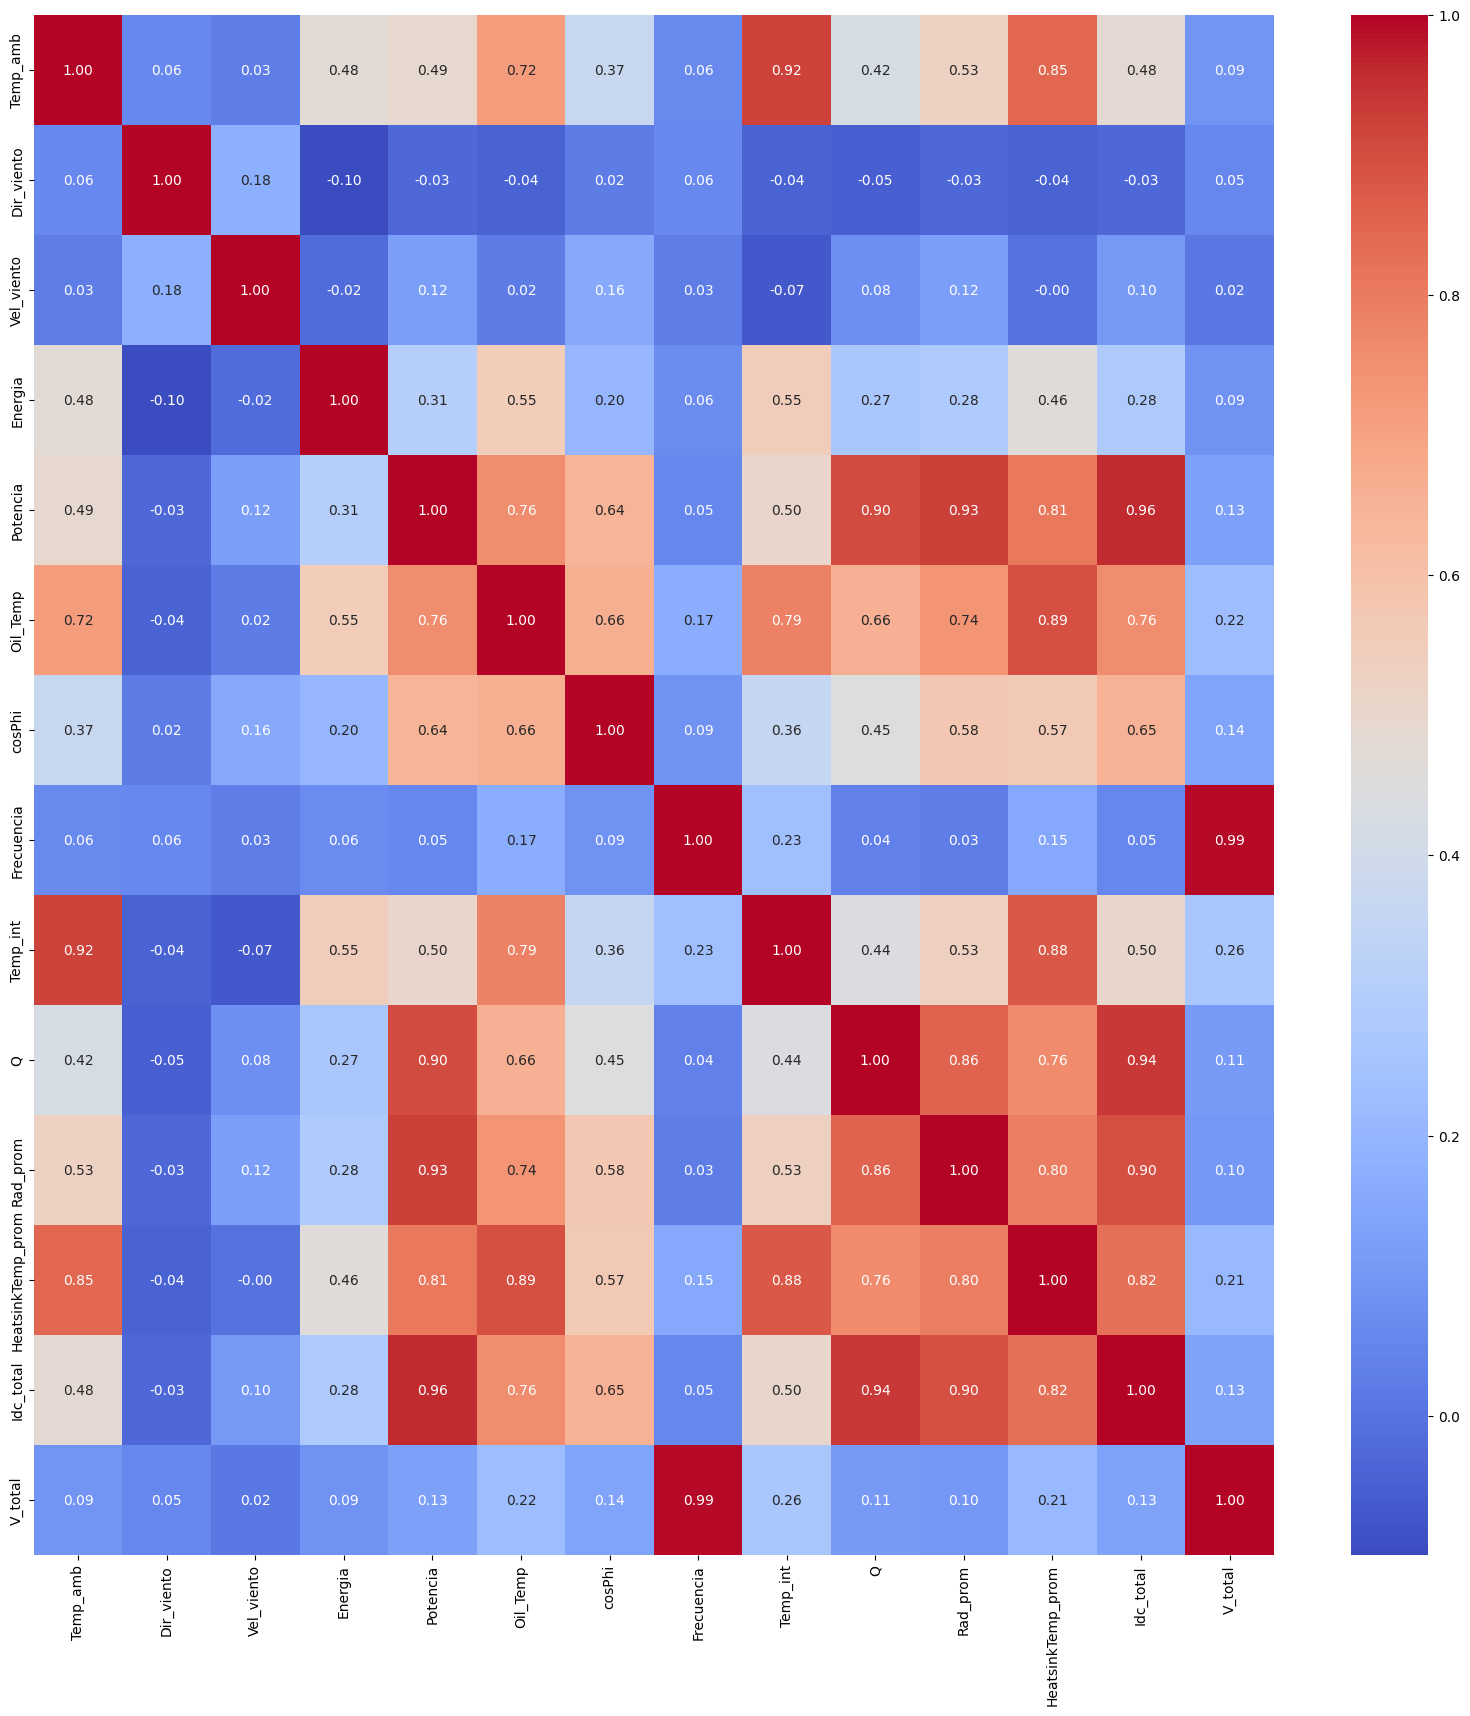

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

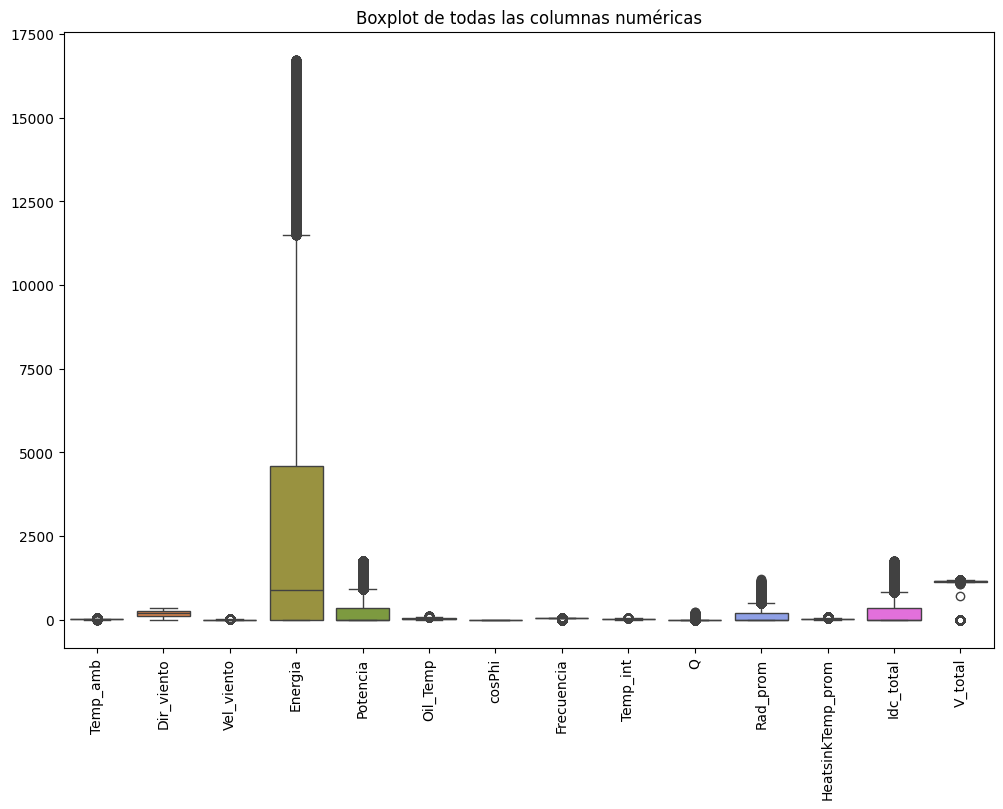

In [13]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura (puedes ajustarlo)
sns.boxplot(df)
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje X si es necesario
plt.title('Boxplot de todas las columnas numéricas')  # Título
plt.show()

# 4. ANÁLISIS UNIVARIANTE

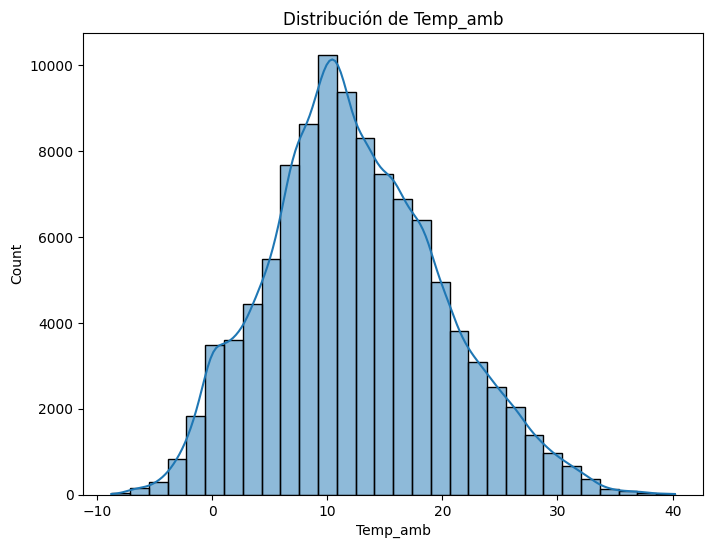

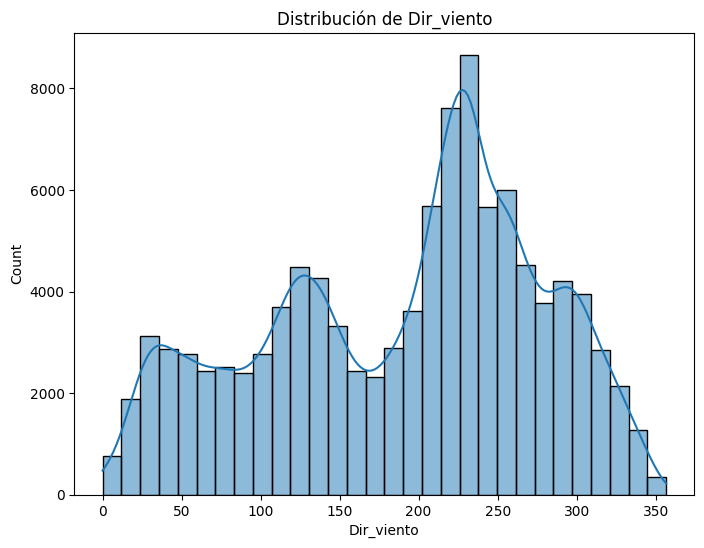

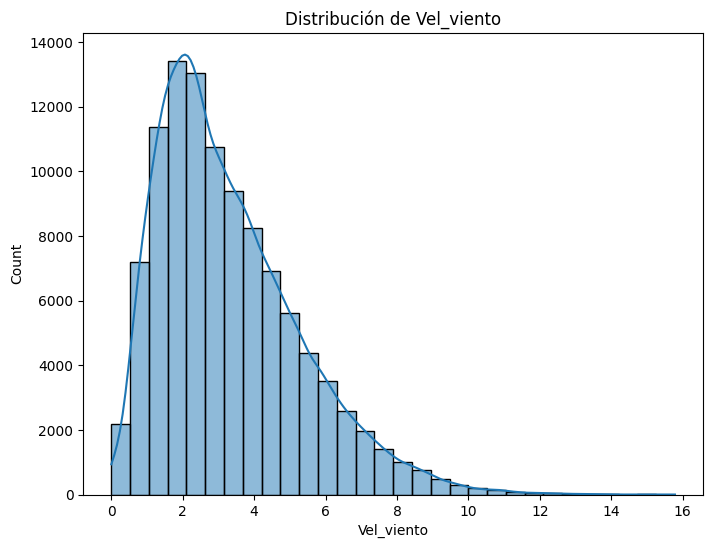

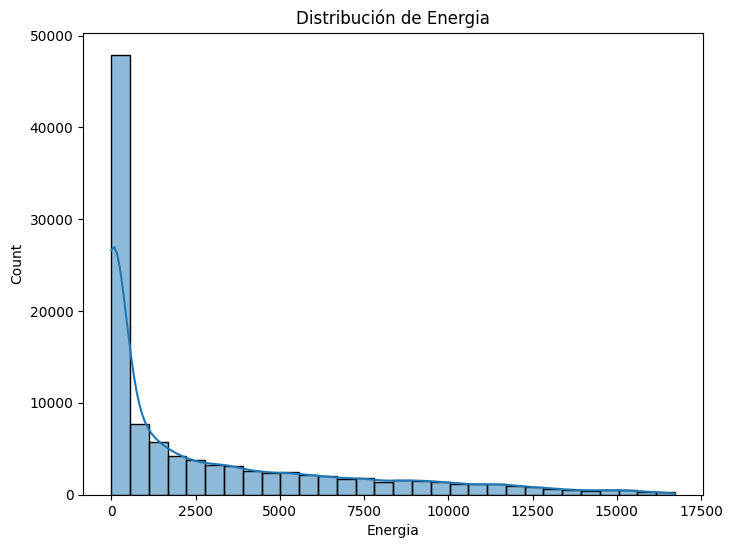

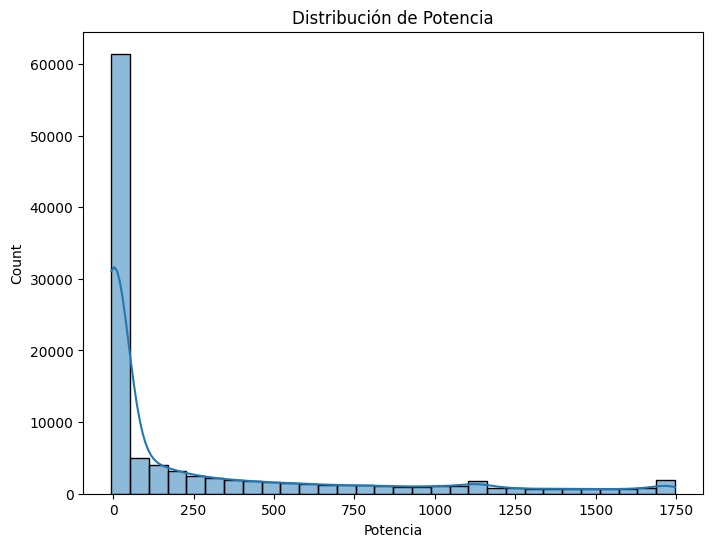

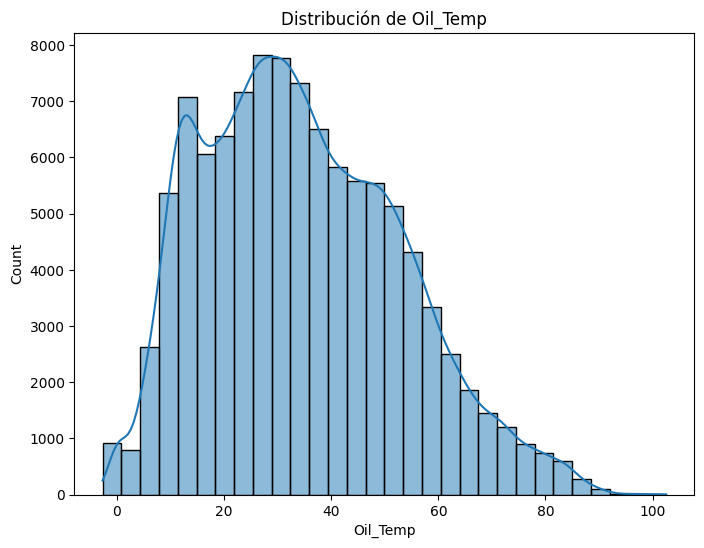

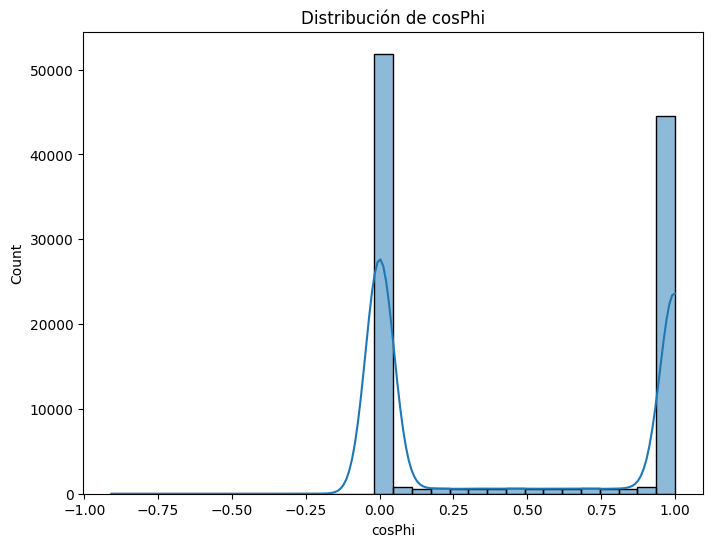

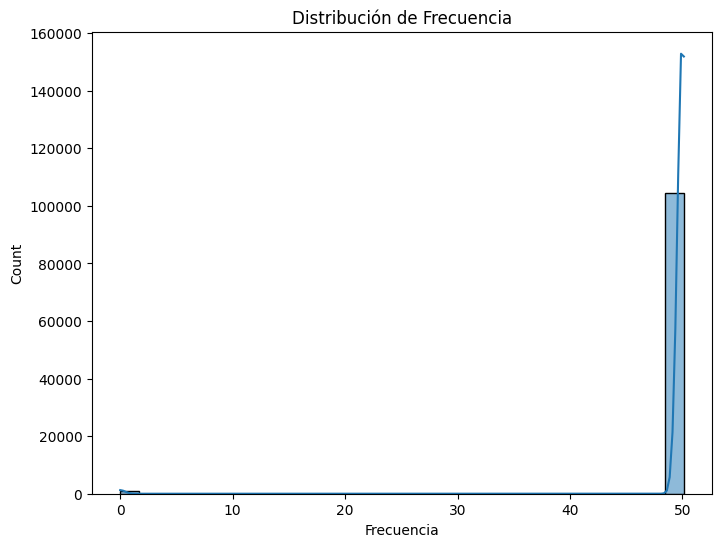

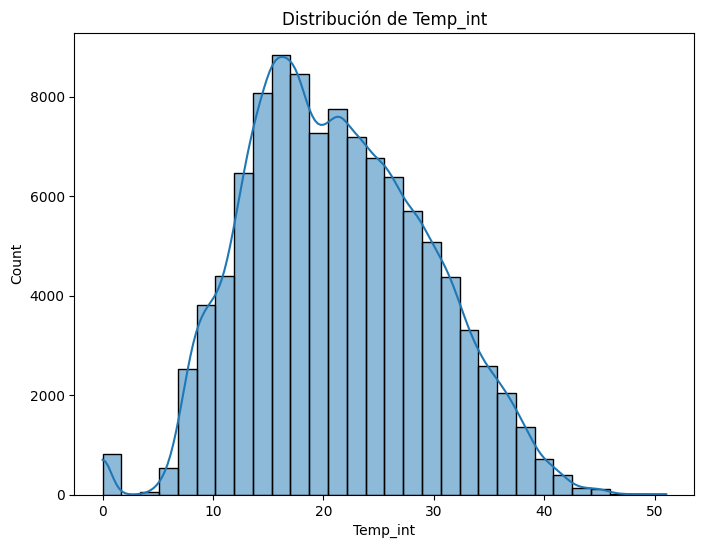

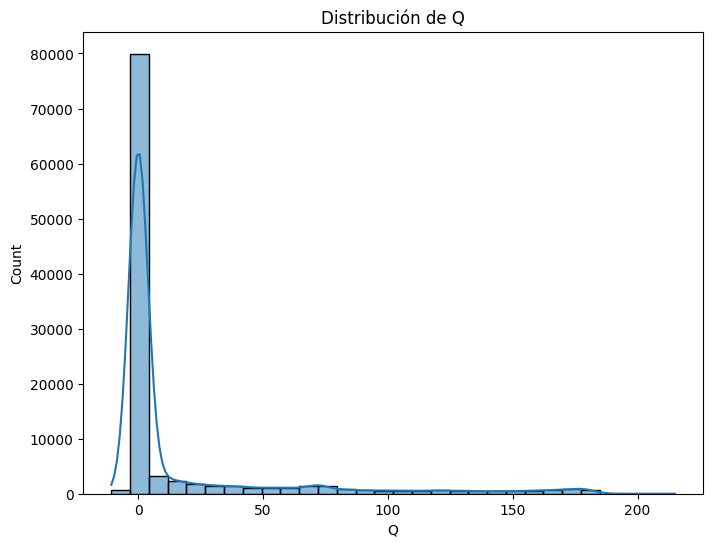

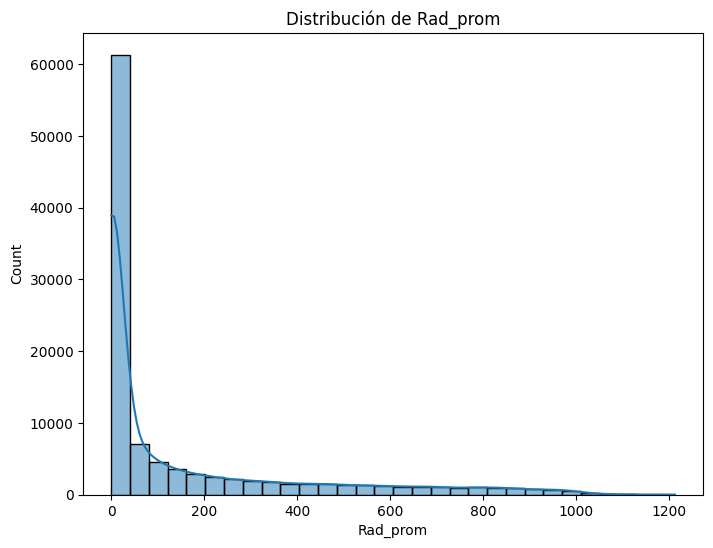

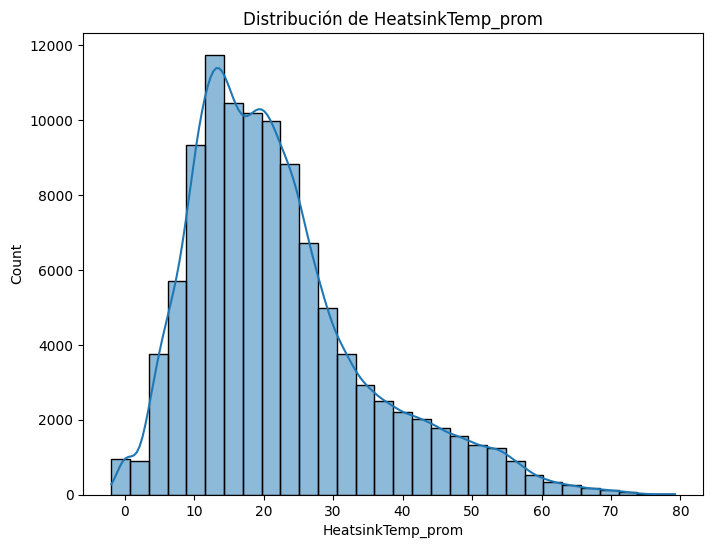

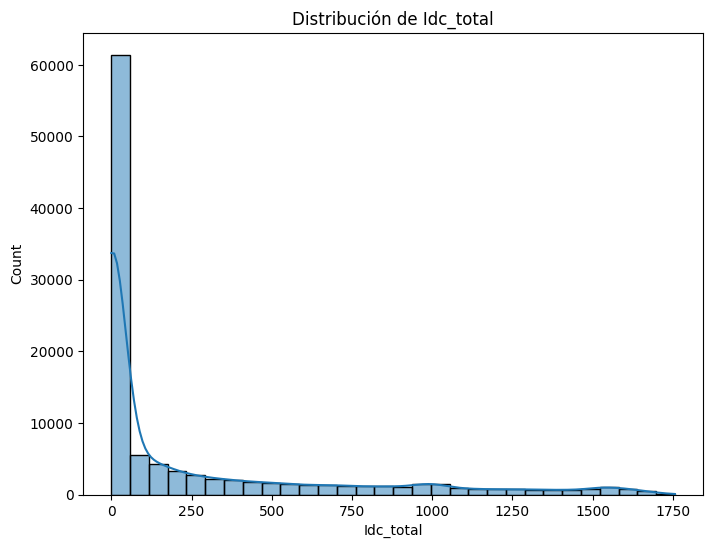

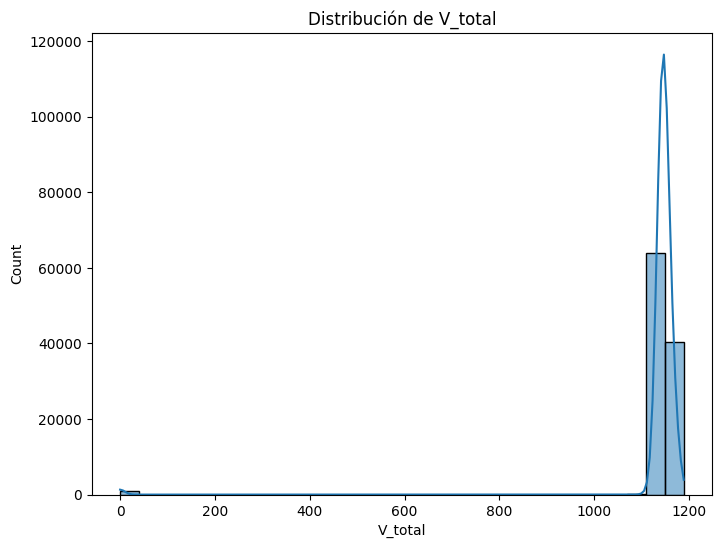

In [14]:
# Lista de columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Generar histogramas y curvas KDE para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()


# 5. ANÁLISIS BIVARIANTE

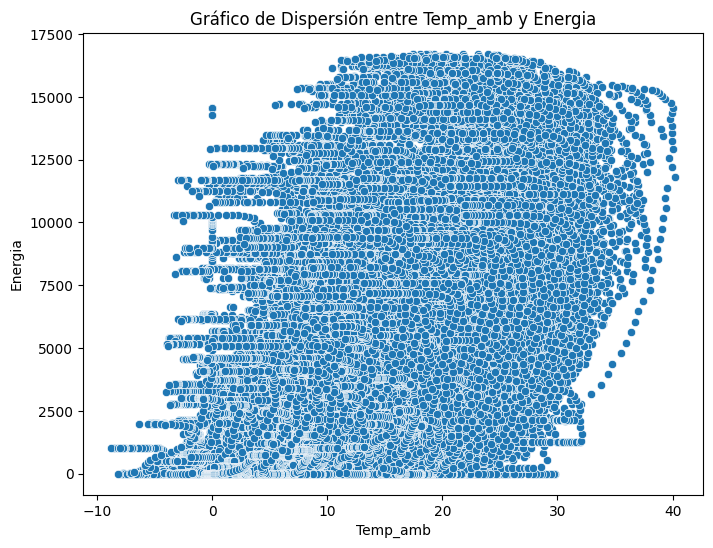

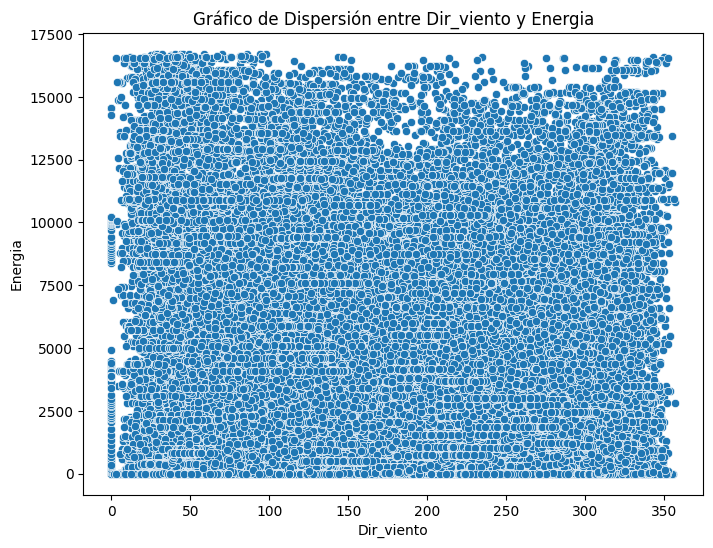

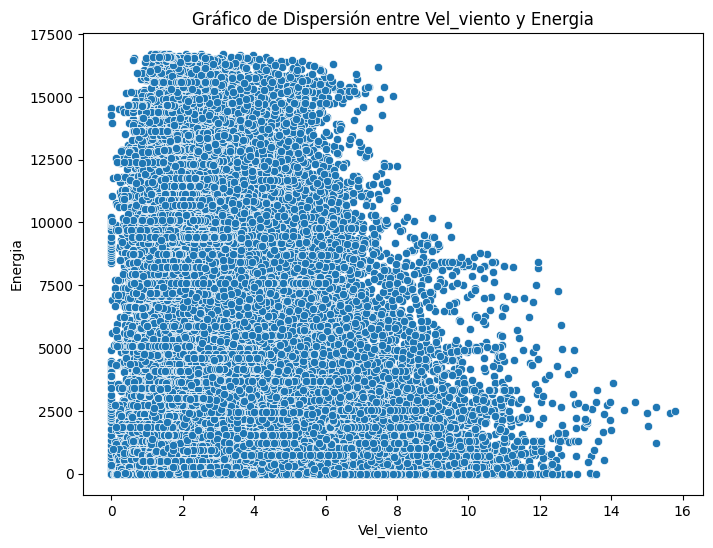

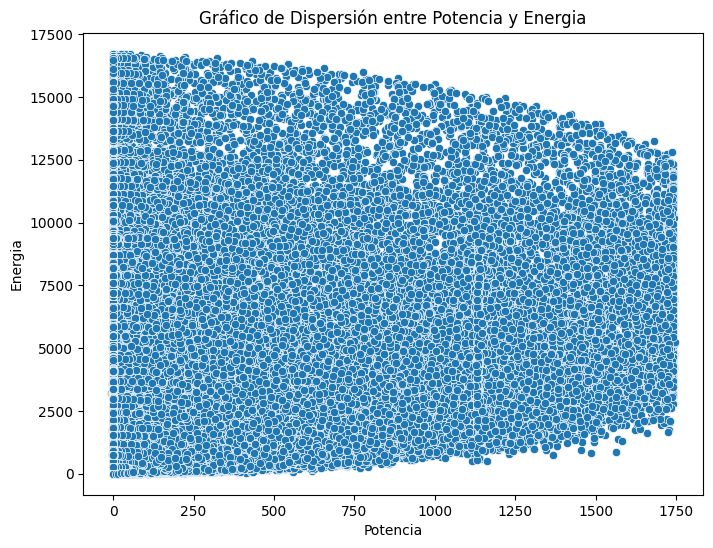

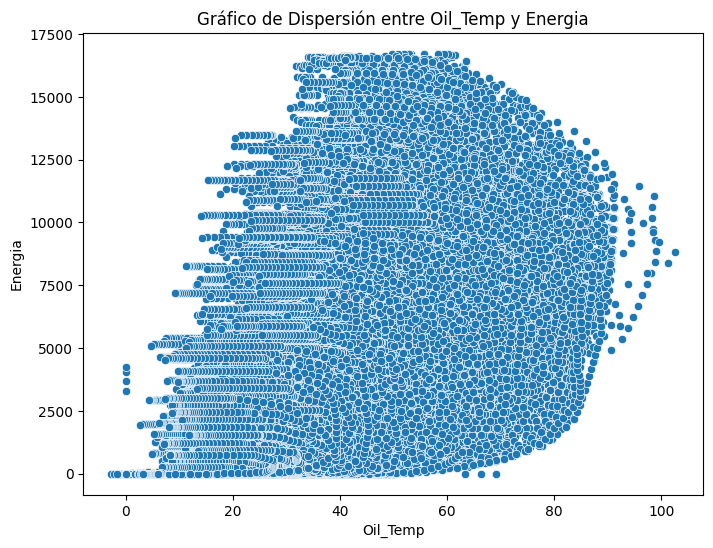

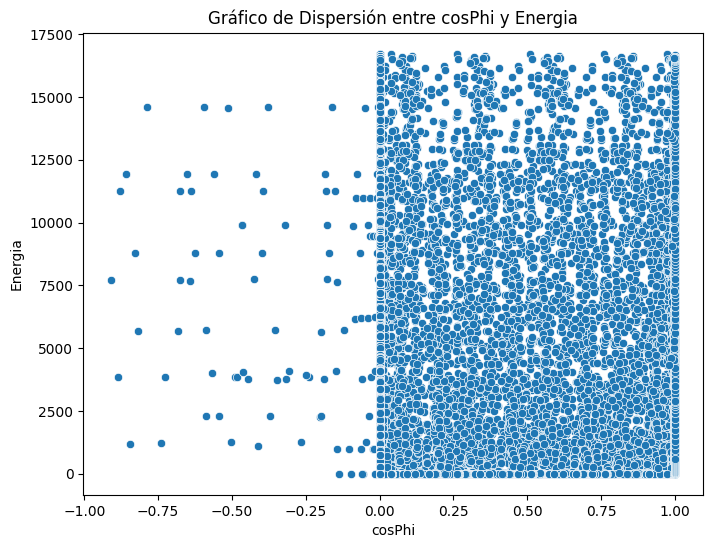

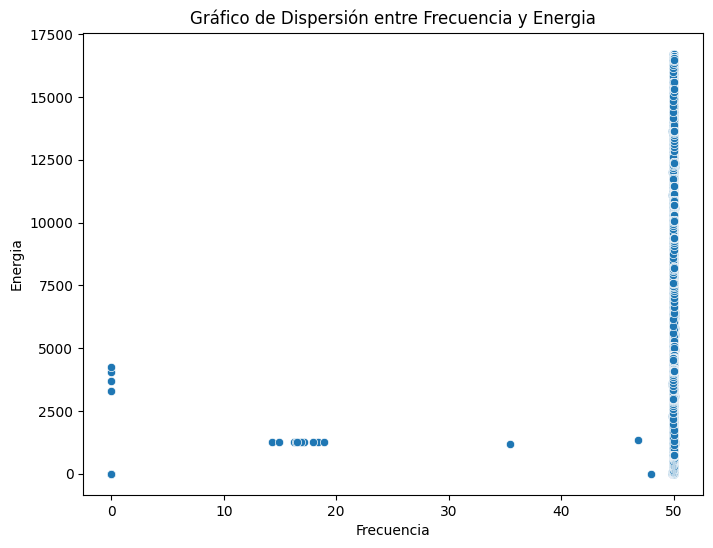

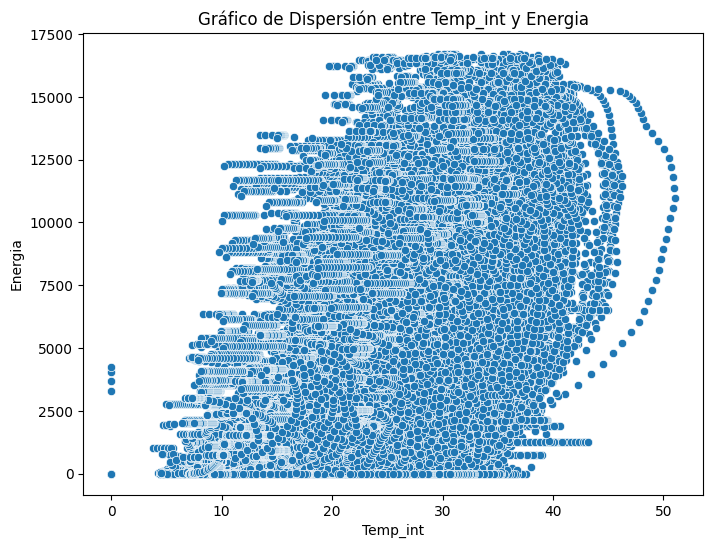

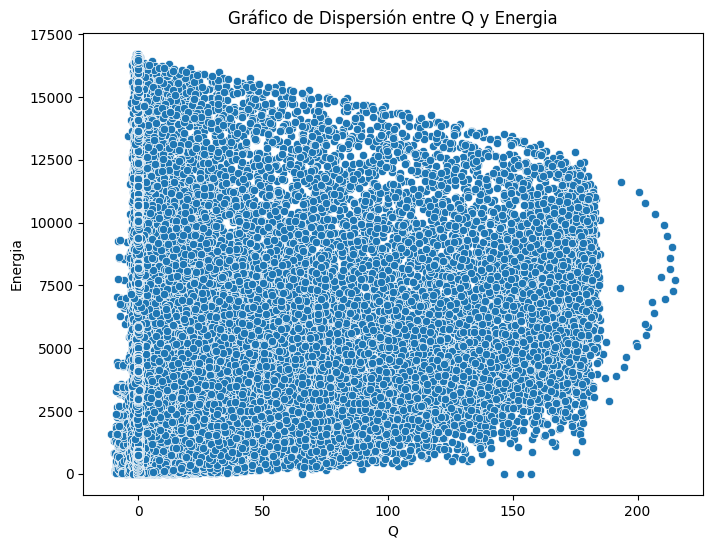

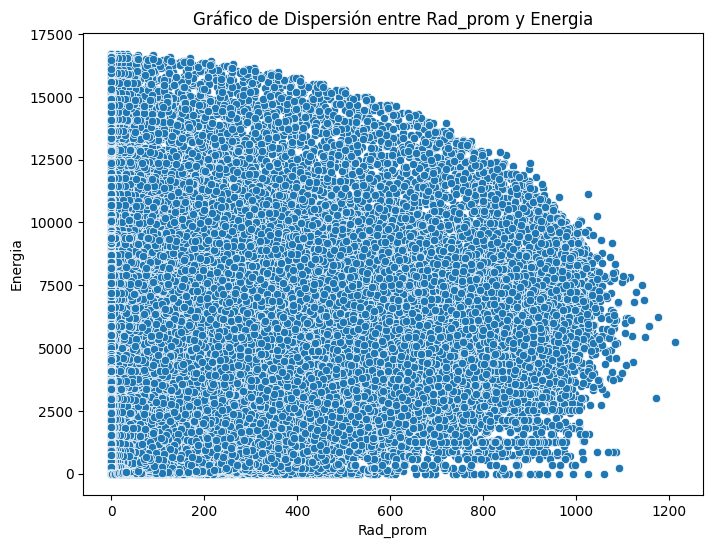

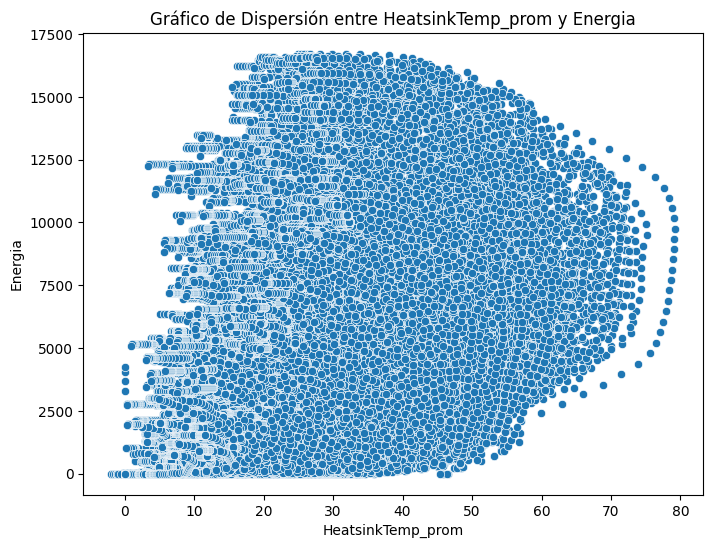

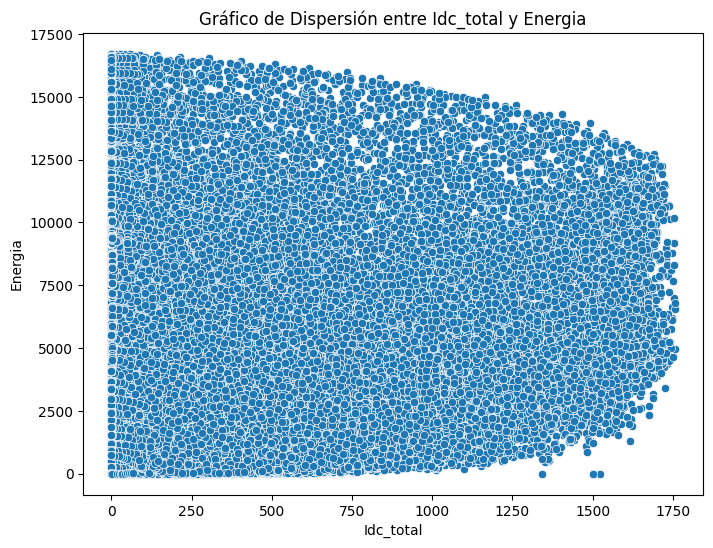

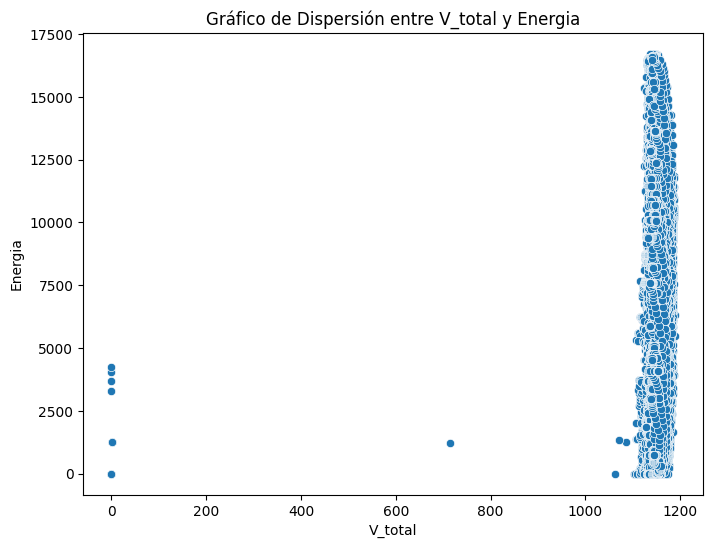

In [15]:
# Lista de las columnas numéricas (excluyendo la columna objetivo)
columnas_numericas = df.select_dtypes(include=['number']).columns
columnas_numericas = columnas_numericas.drop('Energia')

# Gráfico de dispersión entre cada columna numérica y la columna objetivo
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[columna], y=df['Energia'])
    plt.title(f'Gráfico de Dispersión entre {columna} y Energia')
    plt.show()


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
X = df.drop(columns='Energia')  # Características
y = df['Energia']  # Etiqueta

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
importances = model.feature_importances_
features = X.columns

# Mostrar las importancias
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
7            Temp_int    0.343347
4            Oil_Temp    0.178686
10  HeatsinkTemp_prom    0.078496
0            Temp_amb    0.062147
1          Dir_viento    0.059093
5              cosPhi    0.052961
9            Rad_prom    0.049694
6          Frecuencia    0.046231
11          Idc_total    0.036194
2          Vel_viento    0.035176
12            V_total    0.031189
3            Potencia    0.014782
8                   Q    0.012003


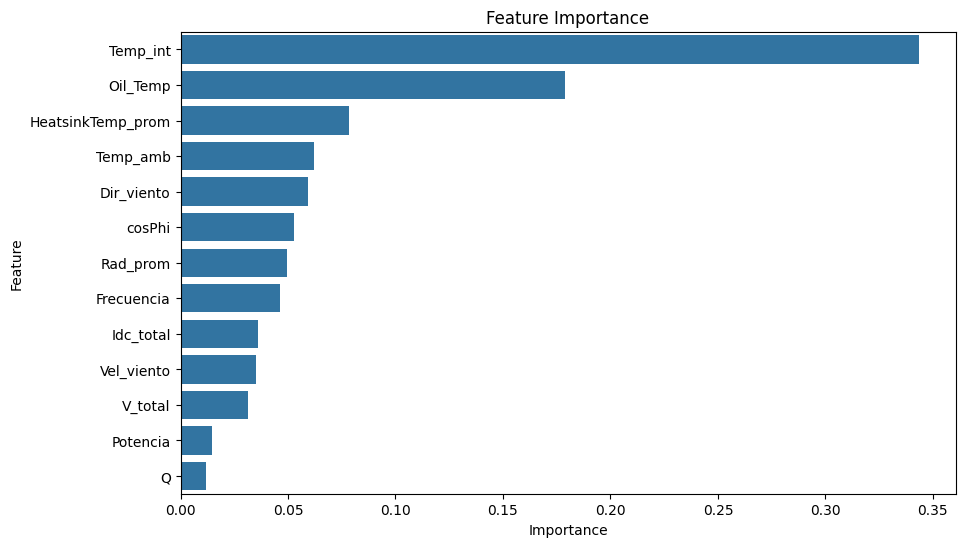

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [27]:
df

Temp_amb  Dir_viento  Vel_viento     Energia  Potencia  \
Fecha_Hora                                                                     
2022-01-01 00:00:00  11.346512  222.558422    2.611367   26.931747       0.0   
2022-01-01 00:15:00  11.300000  223.087589    2.582713    0.000000       0.0   
2022-01-01 00:30:00  11.306667  224.893609    2.640629    0.000000       0.0   
2022-01-01 00:45:00  11.293333  223.534547    2.808005    0.000000       0.0   
2022-01-01 01:00:00  11.259853  230.927235    3.147298    0.000000       0.0   
...                        ...         ...         ...         ...       ...   
2024-12-31 22:45:00   4.145149  223.663976    5.285611  740.750000       0.0   
2024-12-31 23:00:00   4.245148  219.700928    5.490529  740.750000       0.0   
2024-12-31 23:15:00   4.376957  222.824833    5.048825  740.750000       0.0   
2024-12-31 23:30:00   4.493333  220.484426    4.876356  740.750000       0.0   
2024-12-31 23:45:00   4.596948  224.630742    5.562876  738.937094       0.0   

                      Oil_Temp  cosPhi  Frecuencia   Temp_int    Q  Rad_prom  \
Fecha_Hora                                                                     
2022-01-01 00:00:00  26.079072     0.0   49.960499  20.329768  0.0       0.0   
2022-01-01 00:15:00  25.479083     0.0   49.959999  20.179770  0.0       0.0   
2022-01-01 00:30:00  24.879095     0.0   49.959999  20.029773  0.0       0.0   
2022-01-01 00:45:00  24.279182     0.0   49.959999  19.879776  0.0       0.0   
2022-01-01 01:00:00  23.745968     0.0   49.960503  19.741495  0.0       0.0   
...                        ...     ...         ...        ...  ...       ...   
2024-12-31 22:45:00   8.529718     0.0   50.000000  10.085310  0.0       0.0   
2024-12-31 23:00:00   8.329723     0.0   50.000000  10.117952  0.0       0.0   
2024-12-31 23:15:00   8.329723     0.0   50.000000  10.117952  0.0       0.0   
2024-12-31 23:30:00   8.329723     0.0   50.000000  10.117952  0.0       0.0   
2024-12-31 23:45:00   8.329723     0.0   50.000000  10.117952  0.0       0.0   

                     HeatsinkTemp_prom  Idc_total      V_total  
Fecha_Hora                                                      
2022-01-01 00:00:00          17.075259        0.0  1146.307697  
2022-01-01 00:15:00          16.883596        0.0  1147.522942  
2022-01-01 00:30:00          16.691933        0.0  1150.385870  
2022-01-01 00:45:00          16.506316        0.0  1153.091744  
2022-01-01 01:00:00          16.404334        0.0  1150.639247  
...                                ...        ...          ...  
2024-12-31 22:45:00           7.151938        0.0  1145.415732  
2024-12-31 23:00:00           7.165451        0.0  1145.233798  
2024-12-31 23:15:00           7.165451        0.0  1145.233798  
2024-12-31 23:30:00           7.165451        0.0  1145.233798  
2024-12-31 23:45:00           7.165451        0.0  1145.233798  

[105216 rows x 14 columns]

In [28]:
df.to_csv(r'C:\Users\javier.sdiaz\Proyecto ML_2025\data\processed\PFV Machine Learning_procesado.csv', index=True)